1. Entrenamiento de modelos de aprendizaje automático.
2. Evaluación de modelos de aprendizaje automático.
3. Ajuste de hiperparámetros.

**n_jobs=None**: use un solo núcleo o el valor predeterminado configurado por su biblioteca de backend.

**n_jobs=2**: utilice el número especificado de núcleos, en este caso 2.

**n_jobs=-1**: utiliza todos los núcleos disponibles.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns 
import pandas as pd
import os

from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.ensemble import ExtraTreesClassifier #decision trees 

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from time import time
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

from collections import Counter  

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

>cores=1: 7.616 seconds
>cores=2: 4.754 seconds
>cores=3: 4.686 seconds
>cores=4: 3.385 seconds
>cores=5: 3.222 seconds
>cores=6: 2.310 seconds
>cores=7: 3.106 seconds
>cores=8: 2.042 seconds
>cores=9: 1.980 seconds
>cores=10: 1.751 seconds
>cores=11: 1.762 seconds
>cores=12: 1.744 seconds


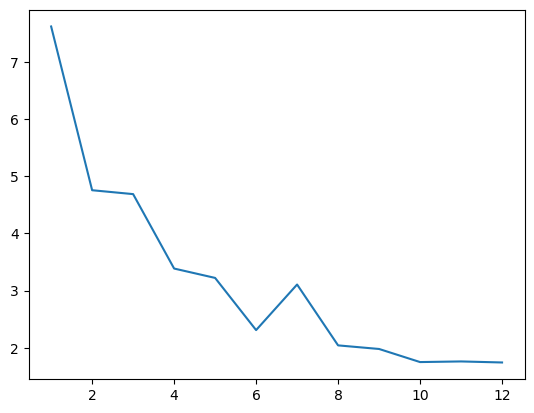

In [4]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
results = list()
# compare timing for number of cores
n_cores = [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12]
for n in n_cores:
 # define the model
 model = RandomForestClassifier(n_estimators=100, n_jobs=1)
 # define the evaluation procedure
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 # record the current time
 start = time()
 # evaluate the model
 n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=n)
 # record the current time
 end = time()
 # store execution time
 result = end - start
 print('>cores=%d: %.3f seconds' % (n, result))
 results.append(result)
plt.plot(n_cores, results)
plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV
grid = dict()
grid['max_features'] = [1, 2, 3, 4, 5]
# define grid search
search = GridSearchCV(model, grid, n_jobs=1, cv=cv)
# record current time
start = time()
# perform search
search.fit(X, y)
# record current time
end = time()
# report execution time
result = end - start
print('%.3f seconds' % result)

33.502 seconds


In [6]:
dataset = pd.read_csv('../datasets/creditcard.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
X = dataset.iloc[:, :-1].values 
Y = dataset.iloc[:, -1].values 



In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)


In [9]:
print(pd.value_counts(dataset['Class'], sort = True))

0    284315
1       492
Name: Class, dtype: int64


In [10]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
#os =  RandomOverSampler()
#X_train_res, Y_train_res = os.fit_resample(X_train, Y_train)
 
#print ("before resampling {}".format(Counter(Y_train)))
#print ("after resampling {}".format(Counter(Y_train_res)))

#os_us = SMOTETomek()
#X_train_res, Y_train_res = os_us.fit_resample(X_train, Y_train)

In [11]:
model = RandomForestClassifier(n_estimators=100, n_jobs=4)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=4)


In [12]:
model.fit(X_train, Y_train)


RandomForestClassifier(n_jobs=4)

In [13]:
Y_pred = model.predict(X_test)

In [14]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9994850368081645


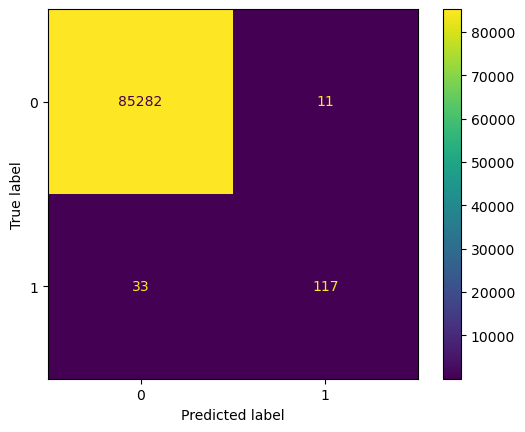

In [15]:
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [17]:

#for i in range(3):
#    tree = rf.estimators_[i]
#    dot_data = export_graphviz(tree,
#                               feature_names=X_train.columns,  
#                              filled=True,  
#                               max_depth=2, 
#                               impurity=False, 
#                               proportion=True)
#    graph = graphviz.Source(dot_data)
#    display(graph)

# Hyperparameter Tuning

**n_estimators:** el número de árboles de decisión en el bosque. Aumentar este hiperparámetro generalmente mejora el rendimiento del modelo, pero también aumenta el costo computacional del entrenamiento y la predicción.

**max_ Depth:** la profundidad máxima de cada árbol de decisión en el bosque. Establecer un valor más alto para max_profundidad puede provocar un sobreajuste, mientras que establecerlo demasiado bajo puede provocar un ajuste insuficiente.

**RandomizedSearchCV** entrenará muchos modelos definidos por n_iter_ y guardará cada uno como variables, el siguiente código crea una variable para el mejor modelo e imprime los hiperparámetros. En este caso, no hemos pasado un sistema de puntuación a la función, por lo que el valor predeterminado hasta la precisión. Esta función también utiliza validación cruzada, lo que significa que divide los datos en cinco grupos del mismo tamaño y usa 4 para entrenar y 1 para probar el resultado. Recorrerá cada grupo y dará una puntuación de precisión, que se promedia para encontrar el mejor modelo.

In [25]:
param_dist = {'n_estimators': randint(50,100),'max_depth': randint(1,10)}

# Create a random forest classifier
rf = RandomForestClassifier(n_jobs=-1)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5, 
                                 n_jobs=-1)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f80459bf6a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f803c5ebdf0>})

In [26]:
best_rf = rand_search.best_estimator_
best_rf


RandomForestClassifier(max_depth=8, n_estimators=51, n_jobs=-1)

max_depth = 8, n_estimator=51, n_jobs=4

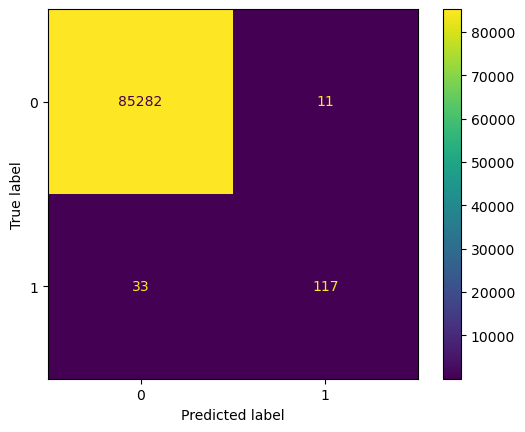

In [27]:
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()